**Proyek Mandiri LSTM**

Import library

In [1]:
import numpy as np
import pandas as pd 
from google.colab import drive

from matplotlib import pyplot as plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from math import sqrt



In [2]:
# pip install EMD-signal

Load Dataset

In [3]:
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [4]:
path_train_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/AAPL_train.csv'
df_train = pd.read_csv(path_train_dataset)
df = pd.read_csv(path_train_dataset)
# df_train = df_train[['open','high','low']]
df_train = df_train[['close']]



In [5]:
# df_train.tail()
df_train_target = df[['close']]

In [6]:
#load test set
path_test_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/AAPL_test.csv'
df_test = pd.read_csv(path_test_dataset)
test_valid = df_test[['close']]
df_test_save = df_test
# df_test.head()
# df_test = df_test[['open','high','low']]
df_test = df_test[['close']]

In [7]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
977,2016-12-23,115.5900,116.5200,115.5900,116.5200,14249484,AAPL
978,2016-12-27,116.5200,117.8000,116.4900,117.2600,18296855,AAPL
979,2016-12-28,117.5200,118.0166,116.2000,116.7600,20905892,AAPL
980,2016-12-29,116.4500,117.1095,116.4000,116.7300,15039519,AAPL


In [8]:
df_test_save 

,date,open,high,low,close,volume,Name
0,2017-01-03,115.800,116.3300,114.7600,116.15,28781865,AAPL
1,2017-01-04,115.850,116.5100,115.7500,116.02,21118116,AAPL
2,2017-01-05,115.920,116.8642,115.8100,116.61,22193587,AAPL
3,2017-01-06,116.780,118.1600,116.4700,117.91,31751900,AAPL
4,2017-01-09,117.950,119.4300,117.9400,118.99,33561948,AAPL
...,...,...,...,...,...,...,...
272,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL
273,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL
274,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL
275,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL


In [9]:
df_train

,close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
977,116.5200
978,117.2600
979,116.7600
980,116.7300


Preprocessing

In [10]:
#preproceesing training data
add = df_train[-7:]
test_data = add
test_data.reset_index()

test_data = test_data.append(df_test)
test_data

,close
975,117.06
976,116.29
977,116.52
978,117.26
979,116.76
...,...
272,167.78
273,160.50
274,156.49
275,163.03


In [11]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(df_train)
scaled_X_train = Xscaler.transform(df_train)


In [12]:
scaled_X_train

array([[0.15625287],
       [0.1654123 ],
       [0.14315355],
       [0.1415061 ],
       [0.140729  ],
       [0.12883289],
       [0.12851816],
       [0.10790687],
       [0.10274433],
       [0.11153334],
       [0.09671274],
       [0.10812834],
       [0.09998692],
       [0.0941224 ],
       [0.07389966],
       [0.0546198 ],
       [0.07514561],
       [0.06500315],
       [0.07410688],
       [0.07621153],
       [0.08759087],
       [0.07012425],
       [0.0699766 ],
       [0.07765564],
       [0.0983032 ],
       [0.12061764],
       [0.11834203],
       [0.11388277],
       [0.11508468],
       [0.1320708 ],
       [0.13515978],
       [0.13063835],
       [0.11388277],
       [0.0964537 ],
       [0.07101273],
       [0.07264464],
       [0.07671147],
       [0.06881095],
       [0.06044805],
       [0.06601727],
       [0.06744195],
       [0.08355772],
       [0.08104121],
       [0.07265889],
       [0.05424938],
       [0.06607296],
       [0.02270299],
       [0.002

In [13]:
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(df_train_target)
scaled_y_train = Yscaler.transform(df_train_target)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)
 
scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(982, 1)
(982,)


In [14]:
scaled_y_train

array([0.        , 0.15625287, 0.1654123 , 0.14315355, 0.1415061 ,
       0.140729  , 0.12883289, 0.12851816, 0.10790687, 0.10274433,
       0.11153334, 0.09671274, 0.10812834, 0.09998692, 0.0941224 ,
       0.07389966, 0.0546198 , 0.07514561, 0.06500315, 0.07410688,
       0.07621153, 0.08759087, 0.07012425, 0.0699766 , 0.07765564,
       0.0983032 , 0.12061764, 0.11834203, 0.11388277, 0.11508468,
       0.1320708 , 0.13515978, 0.13063835, 0.11388277, 0.0964537 ,
       0.07101273, 0.07264464, 0.07671147, 0.06881095, 0.06044805,
       0.06601727, 0.06744195, 0.08355772, 0.08104121, 0.07265889,
       0.05424938, 0.06607296, 0.02270299, 0.0028131 , 0.        ,
       0.0150615 , 0.0288641 , 0.02762851, 0.03302677, 0.04935624,
       0.07325207, 0.09667518, 0.09021877, 0.10174576, 0.10999727,
       0.12984959, 0.12605346, 0.13564158, 0.12256039, 0.11552893,
       0.11880441, 0.09867362, 0.07090135, 0.0814997 , 0.0790609 ,
       0.09695364, 0.09090262, 0.09403692, 0.09549139, 0.10106

In [15]:
n_input = 7 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= df_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
#b_size = 64
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
 
print(generator[0][0].shape)

(32, 7, 1)


In [16]:
print(df_train.shape)

(982, 1)


Arsitektur LSTM

In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 100, activation='relu',return_sequences = True, input_shape = (n_input, n_features)))
regressor.add(LSTM(units = 50,activation='relu'))
regressor.add(Dense(units = 1))
opt = keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer=opt, loss='mse')
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [18]:
#  regressor.fit_generator(generator,epochs=40)
regressor.fit_generator(generator,epochs=40)
 # test 1 epoch 40
 # test 2 epoch 60

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 23s 10ms/step - loss: 0.2065
Epoch 2/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 3/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 4/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 5/40
31/31 [==============================] - 0s 10ms/step - loss: 9.7318e-04
Epoch 6/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 7/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 8/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 9/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 10/40
31/31 [==============================] - 0s 10ms/step - loss: 8.3824e-04
Epoch 11/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 12/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 13/40
31/31 [============================

In [19]:
scaled_X_test = Xscaler.transform(test_data)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(test_data)), length=n_input, batch_size=b_size)
# print(test_generator[0][0].shape)

In [20]:
y_pred_scaled = regressor.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [21]:
y_pred

array([[115.54255 ],
       [115.33141 ],
       [115.237305],
       [115.34468 ],
       [115.58807 ],
       [116.17748 ],
       [116.73345 ],
       [117.24806 ],
       [117.61099 ],
       [117.86397 ],
       [118.1654  ],
       [118.51159 ],
       [118.70417 ],
       [118.74889 ],
       [118.784874],
       [118.89137 ],
       [119.31642 ],
       [119.81848 ],
       [120.19411 ],
       [120.33536 ],
       [120.38868 ],
       [121.78895 ],
       [123.75277 ],
       [124.604195],
       [125.67711 ],
       [127.068405],
       [128.55475 ],
       [130.02313 ],
       [130.42314 ],
       [131.02655 ],
       [132.11014 ],
       [133.04005 ],
       [133.49033 ],
       [133.89186 ],
       [134.56264 ],
       [135.39246 ],
       [135.78387 ],
       [135.85828 ],
       [136.09642 ],
       [136.36812 ],
       [137.12643 ],
       [137.78036 ],
       [137.94568 ],
       [138.38295 ],
       [138.6548  ],
       [138.9259  ],
       [139.0331  ],
       [138.9

In [22]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [23]:
print(test_valid)

      close
0    116.15
1    116.02
2    116.61
3    117.91
4    118.99
..      ...
272  167.78
273  160.50
274  156.49
275  163.03
276  159.54

[277 rows x 1 columns]


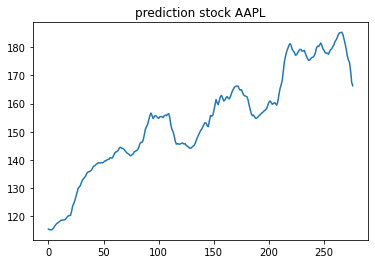

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.title('prediction stock AAPL')
plt.show()

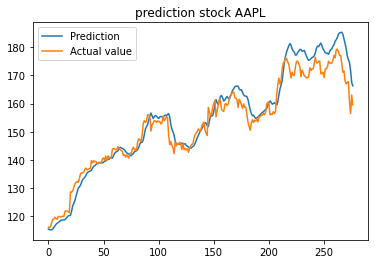

In [25]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label = "Prediction")

# plotting the line 2 points 
plt.plot(test_valid, label = "Actual value")
# plt.xlabel('x - axis')
# Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('prediction stock AAPL')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [26]:
# loss = keras.losses.mean_squared_error(test_valid, y_pred)
mse = mean_squared_error(test_valid, y_pred)
rmse = sqrt(mse)

In [27]:
print("mse = ",mse)
print("rmse = ",rmse)

mse =  19.70733339130397
rmse =  4.439294244731246
